# DSC 80: Project 01

### Checkpoint Due Date: Thursday Jan 16, 11:59:59 PM (Questions 1-4)
### Due Date: Thursday, Jan 23, 11:59:59 PM

---
# Instructions

This Jupyter Notebook contains the statements of the problems and provides code and markdown cells to display your answers to the problems.  
* Like the lab, your coding work will be developed in the accompanying `project01.py` file, that will be imported into the current notebook. This code will be autograded.
* **For the checkpoint, turn in questions 1-4**

**Do not change the function names in the `*.py` file**
- The functions in the `*.py` file are how your assignment is graded, and they are graded by their name. The dictionary at the end of the file (`GRADED FUNCTIONS`) contains the "grading list". The final function in the file allows your doctests to check that all the necessary functions exist.
- If you changed something you weren't supposed to, just use git to revert!

**Tips for developing in the .py file**:
- Do not change the function names in the starter code; grading is done using these function names.
- Do not change the docstrings in the functions. These are there to tell you if your work is on the right track!
- You are **encouraged to write your own additional functions** to solve the questions! 
    - Developing in python usually consists of larger files, with many short functions.
    - You may write your other functions in an additional `.py` file that you import in `project01.py` -- however, be sure to upload these to gradescope as well!
- Always document your code!

**Tips for testing the correctness of your answers!**
Once you have your work saved in the .py file, you should import the `project01` to test your function out in the notebook. In the notebook you should inspect/analyze the output to assess its correctness!
* Run your functions on the main dataset (`grades`) and ask yourself if the output *looks correct.*
* Run your functions on very small datasets (e.g. 1-5 row table), calculate the expected response by hand, and see if the function output matches (this *is* unit-testing your code with data).
* Run your functions on (large and small) samples of the dataset `grades` (with and without replacement). Does your code break? Or does it still run as expected.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import project01 as proj

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# The Other Side of Gradescope

The file contains the grade-book from a fictional data science course with 535 students. 

**Note: this dataset is synthetically generated; it does not contain real student grades.**

In this project, you will:
1. clean and process the data to compute total course grades according to a fictional syllabus (below),
2. qualitatively understand how students did in the course,
3. understand how student grades vary with small changes in performance on each assignment.

---

The course syllabus is as follows:

* Lab assignments 
    - Each are worth the same amount, regardless of each lab's raw point total.
    - The lowest lab is dropped.
    - Each lab may be revised for one week after submission for a 10% penalty, for two weeks after submission for a 20% penalty, and beyond that for a 50% penalty. Such revisions are reflected in the `Lateness` columns in the gradebook.
    - Labs are 20% of the total grade.
* Projects 
    - Each project consists of an autograded portion, and *possibly* a free response portion.
    - The total points for a single project consist of the sum of the raw score of the two portions.
    - Each are worth the same amount, regardless of each project's raw point total.
    - Projects are 30% of the total grade.
* Checkpoints
    - Project checkpoints are worth 2.5% of the total grade.
* Discussion
    - Discussion notebooks are worth 2.5% of the total grade.
* Exams
    - The midterm is worth 15% of the total grade.
    - The final is worth 30% of the total grade.


### A note on generalization

You may assume that your code will only need to work on a gradebook for a class with the syllabus given above. That is, you may assume that the dataframe `grades` looks like the given one in `data/grades.csv`.

However, such a class:
1. may have a different numbers of labs, projects, discussions, and project checkpoints.
2. may have a different number of students.

You may assume the course components and the naming conventions are as given in the data file.

The dataset was generated by Gradescope; you must attempt to reason about the data as given using what you know as a student who uses Gradescope.

### A note on 'putting everything together'

The goal of this project is to create and assess final grades for a fictional course; if anything, the process is broken down into functions for your convenience and guidance. Here are a few remarks and tips for approaching the projects:
1. If you are having trouble figuring out what a question is asking you to do, look at the big picture and try to understand what the current step is doing to contribute to this big picture. This may clarify what's being asked!
1. These questions intentionally build off of each other and the final result matters! In fact, you can 'get a question correct', but only receive partial credit on it because a previous answer was wrong.
    - Credit for a question will typically receive partial credit based on *how close* your answer is to correct (as well as some credit for a solution in the correct form). 
    - You should try to assess your answer to each question based on what you understand of the data. This might involve writing extensive code (that isn't turned in) just to check your work! Suggestions on checking your work are given in the assignment, but you should also think of your own ways of checking your work.
    - As you do this project, think about the data from the perspective of the student (which should be easy to do!)

In [4]:
grades_fp = os.path.join('data', 'grades.csv')
grades = pd.read_csv(grades_fp)
grades.head()

,PID,College,Level,lab01,lab01 - Max Points,lab01 - Lateness (H:M:S),lab02,lab02 - Max Points,lab02 - Lateness (H:M:S),project01,...,discussion07 - Lateness (H:M:S),discussion08,discussion08 - Max Points,discussion08 - Lateness (H:M:S),discussion09,discussion09 - Max Points,discussion09 - Lateness (H:M:S),discussion10,discussion10 - Max Points,discussion10 - Lateness (H:M:S)
0,A14721419,SI,JR,99.0,100.0,00:00:00,86.0,100.0,00:00:00,75.0,...,00:00:00,10.0,10,00:00:00,10.0,10,780:01:28,10.0,10,00:00:00
1,A14883274,TH,JR,98.0,100.0,00:00:00,52.0,100.0,00:00:00,53.0,...,669:12:21,7.0,10,00:00:00,7.0,10,00:00:00,8.0,10,00:00:00
2,A14164800,SI,SR,86.0,100.0,00:00:00,45.0,100.0,00:00:00,44.0,...,00:00:00,6.0,10,00:04:51,6.0,10,00:00:00,7.0,10,00:00:00
3,A14847419,TH,JR,100.0,100.0,00:00:00,100.0,100.0,00:00:00,78.0,...,00:00:00,10.0,10,00:00:00,10.0,10,00:00:00,10.0,10,00:00:00
4,A14162943,SI,JR,66.0,100.0,00:00:00,33.0,100.0,00:00:00,42.0,...,00:00:00,5.0,10,00:00:00,5.0,10,00:00:00,6.0,10,00:00:00


### Getting started: enumerating the assignments

First, you will list all the 'assignment names' and what part of the syllabus to which they belong.

**Question 1:**

Create a function `get_assignment_names` that takes in a dataframe like `grades` and returns a dictionary with the following structure:
- The keys are the general areas of the syllabus: `lab, project, midterm, final, disc, checkpoint`
- The values are lists that contain the assignment names of that type. For example the lab assignments all have names of the form `labXX` where `XX` is a zero-padded two digit number. See the doctests for more details.

In [5]:
# Function to extract corresponding values from df
def extract_values(df, pat):
    """
    Extracts pat from df keys, and returns
    a list of strings corresponding to pat
    
    :param df: dataframe to extract keys from
    :param pat: pattern to fit
    :return: a list of values corresponding to pat
    """
    return list(df.columns[df.columns.str.contains(pat)])

In [6]:
dic = {}
try:
    lab = extract_values(grades, '^lab[0-9]{2}$')
    dic.update({'lab':lab})
except:
    pass

try:
    project = extract_values(grades, '^project[0-9]{2}$')
    dic.update({'project':project})
except:
    pass

try:
    midterm = extract_values(grades, '^Midterm$')
    dic.update({'midterm':midterm})
except:
    pass

try:
    final = extract_values(grades, '^Final$')
    dic.update({'final':final})
except:
    pass

try:
    disc = extract_values(grades, '^discussion[0-9]{2}$')
    dic.update({'disc':disc})
except:
    pass

try:
    checkpoint = extract_values(grades, '^project[0-9]{2}_checkpoint[0-9]{2}$')
    dic.update({'checkpoint':checkpoint})
except:
    pass

# print(lab, '\n', project, '\n', midterm, '\n', final, '\n', disc, '\n', checkpoint)
print(dic)

{'lab': ['lab01', 'lab02', 'lab03', 'lab04', 'lab05', 'lab06', 'lab07', 'lab08', 'lab09'], 'project': ['project01', 'project02', 'project03', 'project04', 'project05'], 'midterm': ['Midterm'], 'final': ['Final'], 'disc': ['discussion01', 'discussion02', 'discussion03', 'discussion04', 'discussion05', 'discussion06', 'discussion07', 'discussion08', 'discussion09', 'discussion10'], 'checkpoint': ['project02_checkpoint01', 'project02_checkpoint02', 'project03_checkpoint01']}


In [7]:
print(proj.get_assignment_names(grades))

{'lab': ['lab01', 'lab02', 'lab03', 'lab04', 'lab05', 'lab06', 'lab07', 'lab08', 'lab09'], 'project': ['project01', 'project02', 'project03', 'project04', 'project05'], 'midterm': ['Midterm'], 'final': ['Final'], 'disc': ['discussion01', 'discussion02', 'discussion03', 'discussion04', 'discussion05', 'discussion06', 'discussion07', 'discussion08', 'discussion09', 'discussion10'], 'checkpoint': ['project02_checkpoint01', 'project02_checkpoint02', 'project03_checkpoint01']}


### Computing project grades

**Question 2**

Compute the total score for the project portion of the course according to the syllabus. Create a function `projects_total` that takes in `grades` and computes the total project grade for the quarter according to the syllabus. The output Series should contain values between 0 and 1.

*Note*: Don't forget to properly handle students who didn't turn in assignments! (Use your experience and common sense).

*Note:* To check your work, try (1) calculating the score for a few types of students by hand, and (2) calculate the statistics for the class performance on each individual course project, making sure they look reasonable.

In [8]:
# grades.dtypes
# grades['project05 - Lateness (H:M:S)'].unique()
# grades.loc[514]
# sample = grades
# sample['project05_free_response'].unique()

In [9]:
# grades[extract_values(grades, '^project[0-9]{2}')].dtypes

In [10]:
grades_mod = grades.fillna(0) # Fill NaN with 0, deep copy
projects = extract_values(grades, '^project[0-9]{2}$') # Project scores
# proj_max = extract_values(grades, '^project[0-9]{2} - Max Points$') # Project max points
free_resp = extract_values(grades, '^project[0-9]{2}_free_response$') # Free response scores
# free_resp_max = extract_values(grades, '^project[0-9]{2}_free_response - Max Points$') # Free response max points

total = []
for project in projects: # Loop through each project
    if (project + '_free_response') in free_resp: # If project has free response
        total.append((grades_mod[project] + grades_mod[project + '_free_response'])
                     / (grades_mod[project + ' - Max Points'] + grades_mod[project + '_free_response - Max Points']))
    else: # If does not have free response
        total.append(grades_mod[project] / grades_mod[project + ' - Max Points'])

tot_proj = pd.Series(np.sum(np.array(total) / len(projects), axis=0)) # Calculate total project score
# tot_proj

In [11]:
proj.projects_total(grades).equals(tot_proj)

True

In [12]:
projects = extract_values(grades, '^project[0-9]{2}$') # Project scores
proj_max = extract_values(grades, '^project[0-9]{2} - Max Points$') # Project max points
free_resp = extract_values(grades, '^project[0-9]{2}_free_response$') # Free response scores
free_resp_max = extract_values(grades, '^project[0-9]{2}_free_response - Max Points$') # Free response max points

In [13]:
grades[projects + proj_max + free_resp + free_resp_max].sample()

,project01,project02,project03,project04,project05,project01 - Max Points,project02 - Max Points,project03 - Max Points,project04 - Max Points,project05 - Max Points,project01_free_response,project02_free_response,project05_free_response,project01_free_response - Max Points,project02_free_response - Max Points,project05_free_response - Max Points
170,53.0,68.0,88.0,48.0,54.0,85.0,75.0,100.0,75,75,7.0,14.0,13.0,15.0,25.0,25


In [14]:
tot_proj[449]

0.5753333333333333

### Computing lab grades

Now, you will clean and process the lab grades, which is a little more complicated. To do this, you will develop functions that:
- 'normalize' the grades, 
- adjust for late submissions, 
- drop the lowest lab grade, and 
- creates a total lab score for each student.

**Question 3**

Unfortunately, Gradescope sometimes experiences a delay in registering when an assignment is submitted during "periods of heavy usage" (i.e. near a submission deadline). You need to assess when a student's assignment was actually turned in on time, even if Gradescope did not process it in time. To do this, it is helpful to know:
* Every late submission has to be submitted by a TA (late submissions are turned off).
* TAs never submitted a late assignment "just after" the deadline. 
* The deadlines were at midnight and students had to come to staff hours to late-submit their assignment.

Create a function `last_minute_submissions` that takes in the dataframe `grades` and outputs the number of submissions on each assignment that were turned in on time by the student, yet marked 'late' by Gradescope. See the doctest for more details.

*Note:* You have to figure out what truly is a late submission by looking at the data and understanding the facts about the data generating process above. There is some ambiguity in finding which submissions are truly late; you will *make a best guess for a threshold* by looking at this dataset. This question is about 'cleaning' a messy 'data recording process'.

In [15]:
grades[extract_values(grades, '^lab[0-9]{2} - Lateness')].head() #.unique()

,lab01 - Lateness (H:M:S),lab02 - Lateness (H:M:S),lab03 - Lateness (H:M:S),lab04 - Lateness (H:M:S),lab05 - Lateness (H:M:S),lab06 - Lateness (H:M:S),lab07 - Lateness (H:M:S),lab08 - Lateness (H:M:S),lab09 - Lateness (H:M:S)
0,00:00:00,00:00:00,252:56:22,00:00:00,00:00:00,00:00:00,382:51:44,00:00:00,00:00:00
1,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,645:24:50,00:00:00,00:00:00,00:00:00
2,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,764:40:45,00:04:51,00:00:00,00:00:00
3,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00
4,00:00:00,00:00:00,00:00:00,47:42:33,00:00:00,00:00:00,00:00:00,00:00:00,00:00:00


In [16]:
# Helper function to extract seconds from string
def string_to_seconds(series):
    """
    Converts string to seconds
    
    :param series: string to split by '：'
    :return: seeconds corresponds to the string
    """
    
    lst = np.array(series.str.split(':')) # Split hour, minute, second by ':'
    return np.array([int(elem[0]) * 3600 + int(elem[1]) * 60 + int(elem[2]) for elem in lst]) # Return seconds

In [17]:
# string_to_seconds(grades['lab03 - Lateness (H:M:S)'])

In [18]:
threshold = 8 * 60 * 60 # 8 hrs
lab_late = extract_values(grades, '^lab[0-9]{2} - Lateness') # Lab lateness columns
grades_mod = grades[lab_late] # Dataframe containing lab lateness columns
grades_mod = grades_mod.apply(string_to_seconds) # Submission later than threshold
counts = np.sum(grades_mod[grades_mod > 0] < threshold, axis=0) # Number of late submission
counts.index = counts.index.str.slice(0,5)
counts

lab01     2
lab02     0
lab03     2
lab04    12
lab05     7
lab06     8
lab07    16
lab08    11
lab09    26
dtype: int64

In [19]:
# lab = 'lab06'
# np.count_nonzero(grades_mod[grades_mod[lab + ' - Lateness (H:M:S)'] != 0][lab + ' - Lateness (H:M:S)'] < 8 * 60 * 60)

In [20]:
proj.last_minute_submissions(grades).equals(counts)

True

In [21]:
isinstance(counts, pd.Series)

True

In [22]:
np.all(counts.index == ['lab0%d' % d for d in range(1,10)])

True

In [23]:
(counts > 0).sum()

8

**Question 4**

Now you need to adjust the lab grades for late submissions -- however, you need to take into account your investigation in the previous question, since students shouldn't be penalized by a bug in Gradescope!

Create a function `lateness_penalty` that takes in a 'Lateness' column and returns a column of penalties (represented by the values `1.0,0.9,0.8,0.5` according to the syllabus). Only *truly* late submissions should be counted as late.

*Note*: For the purpose of this project, we will only be calculating lateness for labs. There is no penalty for lateness for projects, discussions, nor checkpoints.

In [24]:
col = grades['lab01 - Lateness (H:M:S)']

In [25]:
def penalty(late):
    """
    Calculate penalty of true lateness
    
    :param late: time of lateness
    :return: corresponding penalty
    """

    threshold = 8 * 60 * 60 # 8 hrs
    one_week = 7 * 24 * 60 * 60 # One week = 0.9
    two_weeks = 14 * 24 * 60 * 60 # Two weeks = 0.8, Beyond = 0.5
    
    if late < threshold: # Submitted on time
        return 1.0
    elif late < one_week: # Within one week, 10%
        return 0.9
    elif late < two_weeks: # Within two weeks, 20%
        return 0.8
    else: # Two weeks and beyond, 50%
        return 0.5

penalty_v = np.vectorize(penalty)
# penalty_v(string_to_seconds(col))

In [26]:
pen = proj.lateness_penalty(col)

In [27]:
isinstance(pen, pd.Series)

True

In [28]:
set(pen.unique()) <= {1.0, 0.9, 0.8, 0.5}

True

**Question 5**

Create a function `process_labs` that takes in a dataframe like `grades` and returns a dataframe of processed lab scores. The output should:
* share the same index as `grades`,
* have columns given by the lab assignment names (e.g. `lab01,...lab10`)
* have values representing the lab grades for each assignment, adjusted for Lateness and scaled to a score between 0 and 1.

In [29]:
# Intermediate works
# Works, but some warnings provided
# grades_mod[grades_mod < threshold] = 0 # Set fake lateness as submitted

# Works, but redundant
# grades_mod[lab_late] = grades_mod[lab_late].applymap(lambda val: val if pd.isnull(val) else (0 if val < threshold else val)) # Set fake lateness as submitted on time

# Works, but some warnings provided
# for lab in lab_score: # Loop through each lab
    # grades_mod[lab + ' - Penalty'] = grades_mod[lab + ' - Lateness (H:M:S)'].apply(penalty)

# Works, but too long
# grades_mod[lab_late].applymap(lambda val: 1.0 if val < threshold else (0.9 if val < one_week else (0.8 if val < two_weeks else 0.5)))

In [30]:
def penalty(late):
    """
    Calculate penalty of true lateness
    
    :param late: time of lateness
    :return: corresponding penalty
    """

    threshold = 8 * 60 * 60 # 8 hrs
    one_week = 7 * 24 * 60 * 60 # One week = 0.9
    two_weeks = 14 * 24 * 60 * 60 # Two weeks = 0.8, Beyond = 0.5
    
    if late < threshold: # Submitted on time
        return 1.0
    elif late < one_week: # Within one week, 10%
        return 0.9
    elif late < two_weeks: # Within two weeks, 20%
        return 0.8
    else: # Two weeks and beyond, 50%
        return 0.5

all_labs = extract_values(grades, '^lab[0-9]{2}') # All labs columns
labs = extract_values(grades, '^lab[0-9]{2}$') # Labs columns
lab_late = extract_values(grades, '^lab[0-9]{2} - Lateness') # Lab lateness columns
grades_mod = grades[all_labs].fillna(0) # Fill NaN with 0, deep copy
# grades_mod[lab_late] = grades_mod[lab_late].apply(string_to_seconds) # String to seconds
# penalty = grades_mod[lab_late].applymap(penalty).rename(columns=lambda col: col[0:5] + ' - Penalty') # Create penalty columns

penalty = grades_mod[lab_late].apply(proj.lateness_penalty).rename(columns=lambda col: col[0:5] + ' - Penalty') # Create penalty columns
grades_mod = pd.concat([grades_mod, penalty], axis=1)

In [31]:
df = pd.DataFrame()
for lab in labs: # Loop through each lab
    df[lab] = grades_mod[lab] * grades_mod[lab + ' - Penalty'] / grades_mod[lab + ' - Max Points']

df.head()

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09
0,0.99,0.86,0.72,0.980,1.000000,0.976471,0.485,0.88,0.86
1,0.98,0.52,0.73,0.770,1.000000,0.500000,0.890,0.94,0.86
2,0.86,0.45,0.40,0.730,0.900000,0.429412,0.720,0.71,0.76
3,1.00,1.00,0.92,0.910,0.885714,0.670588,1.000,0.95,0.78
4,0.66,0.33,0.69,0.729,0.642857,0.741176,0.600,0.36,1.00


In [32]:
score = proj.process_labs(grades)
score.head()

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09
0,0.99,0.86,0.72,0.980,1.000000,0.976471,0.485,0.88,0.86
1,0.98,0.52,0.73,0.770,1.000000,0.500000,0.890,0.94,0.86
2,0.86,0.45,0.40,0.730,0.900000,0.429412,0.720,0.71,0.76
3,1.00,1.00,0.92,0.910,0.885714,0.670588,1.000,0.95,0.78
4,0.66,0.33,0.69,0.729,0.642857,0.741176,0.600,0.36,1.00


In [33]:
score.equals(df)

True

In [34]:
score.columns.tolist() == ['lab%02d' % x for x in range(1,10)]

True

In [35]:
np.all((0.65 <= score.mean()) & (score.mean() <= 0.90))

True

**Question 6**

Create a function `lab_total` that takes in dataframe of processed assignments (like the output of Question 5) and computes the total lab grade for each student according to the syllabus (returning a Series). Your answers should be proportions between 0 and 1. For example, if there are only 3 labs, and a student received scores of {80%,90%,100%}, then the total score would be 0.95.

*Note*: Don't forget to properly handle students who didn't turn in assignments! (Use your experience and common sense).

In [36]:
processed = score.copy()
min_score = processed.min(axis=1)
tot_lab = (np.sum(processed, axis=1) - min_score) / (len(processed.columns) - 1) # Calculate total lab score
# tot_lab

In [37]:
proj.lab_total(score).equals(tot_lab)

True

In [38]:
score.sample(2)

,lab01,lab02,lab03,lab04,lab05,lab06,lab07,lab08,lab09
160,0.90,0.96,1.00,0.950,0.742857,0.941176,0.83,0.776,0.84
278,0.99,1.00,0.85,0.819,0.985714,0.988235,0.94,0.960,0.96


In [39]:
tot_lab[327]

0.8035000000000001

### Putting it together

**Question 7**

Finally, you need to create the final course grades. To do this, you will add up the total of each course component according to the weights given in the syllabus. 

* Create a function `total_points` that takes in `grades` and returns the final course grades according to the syllabus. Course grades should be proportions between zero and one.
* Create a function `final_grades` that takes in the final course grades as above and returns a Series of letter grades given by the standard cutoffs (`A >= .90`, `.90 > B >= .80`, `.80 > C >= .70`, `.70 > D >= .60`, `.60 > F`). You should not use rounding to determining the letter grades.
* Create a function `letter_proportions` which takes in the dataframe `grades` and outputs a Series that contains the proportion of the class that received each grade. (This question requires you to put everything together).
* The indices should be ordered by the proportion of the class that receives that grade, from largest to smallest.

*Note 1*: Don't repeat yourself when computing the checkpoint and discussion portions of the course.

*Note 2*: Only the lab portion of the course accounts for late assignments; you may assume all assignments in other portions are turned in without penalty.

*Note 3*: These values should add up to exactly 1.0. If you are getting something close such as 0.99999, that means there is a slight issue with your code from above. 

To check your work, verify the course grade distribution and relevant statistics! Do the work by hand for a few students.

### Part 1 - total_points

In [40]:
# Lab assignments 20%; Projects 30%; Checkpoints 2.5%; Discussion 2.5%; Midterm 15%; Final 30%

In [41]:
# Helper function to calculate disc, checkpoint & exams scores
def other_total(grades, name):
    """
    Given the dataframe and the area name, calculate
    the total grades for that area.
    
    :param grades: dataframe to process
    :param name: area to process grades
    :return: a Series of total area grades
    """
    grades_mod = grades.fillna(0) # Fill NaN with 0, deep copy
    names = proj.get_assignment_names(grades) # Get names
    area = names.get(name) # Get cols of name
    # max_pts = [ar + ' - Max Points' for ar in area] # Get cols of Max Points
    # grades_mod = grades[area + max_pts] # Combined name & Max Points
    df = pd.DataFrame()
    for ar in area: # Loop through each name
        df[ar] = grades[ar] / grades[ar + ' - Max Points']
    total = (np.sum(df, axis=1)) / (len(df.columns)) # Calculate total score
    return total

In [42]:
lab_tot = proj.lab_total(proj.process_labs(grades)) # Labs total
proj_tot = proj.projects_total(grades) # Projects total
chpt_tot = other_total(grades, 'checkpoint') # Checkpoints total
disc_tot = other_total(grades, 'disc') # Discussions total
mid = other_total(grades, 'midterm') # Midterm
fin = other_total(grades, 'final') # Final
total = lab_tot * 0.2 + proj_tot * 0.3 + chpt_tot * 0.025 + disc_tot * 0.025 + mid * 0.15 + fin * 0.3
# total

In [43]:
proj.total_points(grades).equals(total)

True

In [44]:
np.all((0 <= total) & (total <= 1))

True

In [45]:
0.7 < total.mean() < 0.9

True

### Part 2 - final_grades

In [46]:
# Helper function to convert scores to letter grades
def score_to_grades(score):
    """
    Given the total score of a student, calculate the 
    corresponding letter grade.
    
    :param score: total score to convert
    :return: convert total score to letter grade
    """
    
    if score >= 0.90:
        return 'A'
    elif score >= 0.80:
        return 'B'
    elif score >= 0.70:
        return 'C'
    elif score >= 0.60:
        return 'D'
    else:
        return 'F'

In [47]:
total.apply(score_to_grades).equals(proj.final_grades(total))

True

In [48]:
out = proj.final_grades(pd.Series([0.92, 0.81, 0.41]))
np.all(out == ['A', 'B', 'F'])

True

### Part 3 - letter_proportions

In [49]:
total = proj.total_points(grades) # Calculate total scores
letter = proj.final_grades(total) # Convert scores to grades
result = letter.value_counts() / len(letter)
result

B    0.528972
C    0.248598
A    0.140187
D    0.048598
F    0.033645
dtype: float64

In [50]:
result.equals(proj.letter_proportions(grades))

True

In [51]:
np.all(result.index == ['B', 'C', 'A', 'D', 'F'])

True

In [52]:
result.sum() == 1.0

True

### Do Sophomores get better grades?

**Question 8**

You notice that students who are sophomores on average did better in the class (if you can't verify this, you should go back and check your work!). Is this difference significant, or just due to noise?

Perform a hypothesis test, assessing likelihood of the null hypothesis: 
> "sophomores earn grades that are roughly equal on average to the rest of the class."


Create a function `simulate_pval` which takes in the number of simulations `N` and `grades` and returns the the likelihood that the grade of sophomores was no better on average than the class as a whole (i.e. calculate the p-value).

*Note:* To check your work, plot the sampling distribution and the observation. Do these values look reasonable?

# Need to ask!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [150]:
# Check if sophomores get higher average grades
# total = proj.total_points(grades).rename('Score')
# info_all = pd.concat([grades['Level'], total], axis=1)
# info_m = info_all.groupby('Level').mean()
# info_c = info_all.groupby('Level').count()
# info_all

#### Permutation single trial (Wrong way)

In [54]:
# total = proj.total_points(grades).rename('Score') # Calculate total score
# score = pd.concat([grades['Level'], total], axis=1) # Combine score and level
# sopho_avg = np.mean(score['Score'][score['Level'] == 'SO']) # Sophomore average score
# means = score.groupby(score['Level'].apply(lambda x: 'SO' == x)).mean()
# means.index = means.index.map({False: 'Others', True:'SO'})
# obs_diff = means.loc['SO', 'Score'] - means.loc['Others', 'Score']
# means, obs_diff

# shuffled = score.copy() # Deep copy of table
# shuffled['Shuffled_score'] = np.random.permutation(score['Score']) # Put shuffled score in a table
# group_means = shuffled.groupby(score['Level'].apply(lambda x: 'SO' == x)).mean()
# group_means.index = group_means.index.map({False: 'Others', True:'SO'})
# difference = group_means.loc['SO', 'Shuffled_score'] - group_means.loc['Others', 'Shuffled_score']

# N = 1000

# differences = []
# for i in range(N):
    # shuffled = score.copy() # Deep copy of table
    # shuffled['Shuffled_score'] = np.random.permutation(score['Score']) # Put shuffled score in a table
    # group_means = shuffled.groupby(score['Level'].apply(lambda x: 'SO' == x)).mean()
    # group_means.index = group_means.index.map({False: 'Others', True:'SO'})
    # difference = group_means.loc['SO', 'Shuffled_score'] - group_means.loc['Others', 'Shuffled_score']
    # differences.append(difference)

#### [0, 1] testing (Wrong way)

In [377]:
# obs = info_m.loc['SO', 'Score']
# num = info_c.loc['SO', 'Score']
# prop = info_c.loc['SO', 'Score'] / info_all.shape[0]
# obs, num, prop

# N = 100000
# simulations = []
# for i in range(N):
    # simulation = np.random.choice([0, 1], p=[1-prop, prop], size=num) # 0 is other (476), 1 is SO (59)
    # sim_good = (simulation == 1).sum() / num
    # simulations.append(sim_good)
# pd.Series(simulations)

# np.count_nonzero(simulations >= obs) / N

# pd.Series(simulations).hist(bins = 10, alpha = 0.5)
# plt.scatter(obs, 0, s=25, c='r', zorder=10)

#### Hypothesis Testing (Slow way) - 0.007

In [55]:
# obs = info_m.loc['SO', 'Score']
# num = info_c.loc['SO', 'Score']
# prop = info_c.loc['SO', 'Score'] / info_all.shape[0]
# obs, num, prop

(0.8441736462989888, 59, 0.1102803738317757)

In [441]:
%%time
N = 100000
total = proj.total_points(grades).rename('Score')
info_all = pd.concat([grades['Level'], total], axis=1)
num = info_all['Level'].value_counts()['SO']

simulations = []
for i in range(N):
    simulation = info_all.sample(num, replace=False)
    sim = np.mean(simulation['Score'])
    simulations.append(sim)
# pd.Series(simulations)

CPU times: user 1min, sys: 56.6 ms, total: 1min
Wall time: 1min


In [438]:
np.count_nonzero(simulations >= obs) / N

0.0757

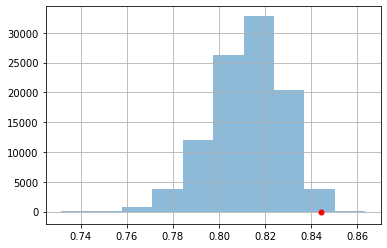

In [216]:
pd.Series(simulations).hist(bins = 10, alpha = 0.5)
plt.scatter(obs, 0, s=25, c='r', zorder=10)

#### Hypothesis Testing (Fast way) - 0.007

In [442]:
%%time
total = proj.total_points(grades).rename('Score') # Final grade
info_all = pd.concat([grades['Level'], total], axis=1) # Dataframe with grade & level
num = info_all['Level'].value_counts()['SO'] # Number of Sophomore students
obs = info_all.groupby('Level').mean().loc['SO', 'Score'] # Score of Sophomore students

samps = []
prop_distr = info_all['Score'].value_counts(normalize=True) # Construct simulation
for i in range(N):
    samp = np.random.choice(prop_distr.index, p=prop_distr, size=num, replace=False)
    samps.append(samp.mean())

# avgs = np.array(np.mean(samps)) # Calculate average

CPU times: user 15.2 s, sys: 14.6 ms, total: 15.2 s
Wall time: 15.2 s


In [443]:
np.count_nonzero(samps >= obs) / N # Return p-value

0.00715

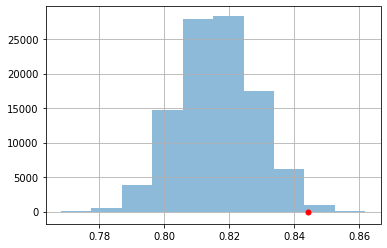

In [444]:
pd.Series(samps).hist(bins = 10, alpha = 0.5)
plt.scatter(obs, 0, s=25, c='r', zorder=10)

#### Hypothesis Testing (Fastest way) - 0.01

In [447]:
%%time
N=10000
total = proj.total_points(grades).rename('Score')
info_all = pd.concat([grades['Level'], total], axis=1)
num = info_all['Level'].value_counts()['SO']
obs = info_all.groupby('Level').mean().loc['SO', 'Score'] # Score of Sophomore students

prop_distr = info_all['Score'].value_counts(normalize=True)
samps = np.random.choice(
    prop_distr.index, 
    p=prop_distr, 
    size=(N, num),
)
#samps.shape
averages = samps.mean(axis=1)
np.count_nonzero(averages >= obs) / N # Return p-value

CPU times: user 179 ms, sys: 3.02 ms, total: 182 ms
Wall time: 178 ms


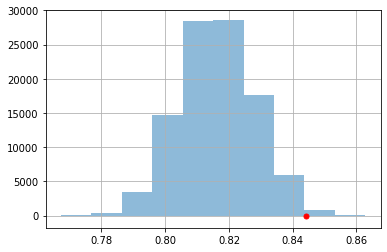

In [218]:
pd.Series(samps).hist(bins = 10, alpha = 0.5)
plt.scatter(obs, 0, s=25, c='r', zorder=10)

In [410]:
many = pd.concat([grades, grades, grades, grades], axis=0).reset_index(drop=True)

In [411]:
%time proj.simulate_pval(many, 100000)

CPU times: user 23.3 s, sys: 3.76 ms, total: 23.3 s
Wall time: 23.3 s


0.0

### What is the true distribution of grades?

The gradebook for this class only reflects one particular instance of each student's performance, subject to the effects of all the little events and hiccups that occurred throughout the quarter. Might you have done better on the midterm had your roommate kept you up all night with their coughing? Wasn't it lucky that the example you were studying just before the final happened to appear on the exam?

**Question 9**

This question will simulate these '(un)lucky, random events' by adding or subtracting random amounts to each assignment before calculating the final grades. These 'random amounts' will be drawn from a Gaussian distribution of mean 0 and a std deviation 0.02:
```
np.random.normal(0, 0.02, size=(num_rows, num_cols))
```
Intuitively, such a model says that random events may bump up or down a given grade (given as a proportion):
- which on average has no effect on the class as a whole (mean 0),
- which not uncommonly might perturb a grade by 2% (std dev 0.02).

Create a function `total_points_with_noise` that takes in a dataframe like `grades`, adds noise to the assignments as described above, and returns the final scores using *the same procedure* as questions 1-7.

*Note:* You should be able to reuse (or minorly change) the code from previous problems. Try to be DRY (don't repeat yourself)!

*Note 1:* Once adding the noise to the assignment scores, use the `np.clip` function to be sure each assignment retains a score between 0% and 100%.

*Note 2:* To check your work -- what would you expect the difference between the actual scores and noisy scores to be, on average?

#### Slightly Wrong way

In [ ]:
# def clip(name): # I am not using this actually, I am using np.clip!!!!!!!!!!!!!!!!!!!!
    # a_max = grades_mod.loc[0, name + ' - Max Points']
    # return np.clip(grades_mod[name], 0, a_max)

# free_resp = extract_values(grades, '^project[0-9]{2}_free_response$') # Free response scores
# names = list(proj.get_assignment_names(grades).values()) # Get usual cols of assignments
# names.append(free_resp) # Combine the free response
# names_flat = [elem for sub in names for elem in sub] # Flatten nested list to list
# names_max = [elem + ' - Max Points' for elem in names_flat] # Max Points cols

# grades_mod = grades.copy() # Deep copy
# nrows, ncols = grades_mod[names_flat].shape[0], grades[names_flat].shape[1] # Get number of rows and cols
# random_events = np.random.normal(0, 0.02, size=(nrows, ncols)) # Generate random event values
# grades_mod[names_flat] = (grades_mod[names_flat] + random_events).clip(0, list(grades_mod.loc[0, names_max]), axis=1) # Calculate noisy score
# grades_mod[names_flat] = np.clip((grades_mod[names_flat] + random_events), 0, list(grades_mod.loc[0, names_max])) # Calculate noisy score

# proj.total_points(grades_mod).head()
# rand_points = proj.total_points(grades_mod)
# total_points = proj.total_points(grades)
# (total_points - rand_points).mean()

# Need to ask!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#### New way

In [326]:
# Project grades
grades_mod = grades.fillna(0) # Fill NaN with 0, deep copy
projects = extract_values(grades, '^project[0-9]{2}$') # Project scores
free_resp = extract_values(grades, '^project[0-9]{2}_free_response$') # Free response scores

# proj_total = []
proj_tb = pd.DataFrame()
for project in projects: # Loop through each project
    if (project + '_free_response') in free_resp: # If project has free response
        proj_tb[project] = pd.Series((grades_mod[project] + grades_mod[project + '_free_response'])
                     / (grades_mod[project + ' - Max Points'] + grades_mod[project + '_free_response - Max Points']))
    else: # If does not have free response
        proj_tb[project] = pd.Series(grades_mod[project] / grades_mod[project + ' - Max Points'])

# tot_proj = pd.Series(np.sum(np.array(proj_total) / len(projects), axis=0)) # Calculate total project score
# tot_proj
proj_f = np.clip(proj_tb + np.random.normal(0, 0.02, size=(proj_tb.shape[0], proj_tb.shape[1])), 0, 1)
tot_proj = pd.Series(np.sum(proj_f, axis=1) / len(projects)) # Calculate total project score
# tot_proj

In [327]:
# Lab grades
lab_tb = proj.process_labs(grades_mod)
lab = np.clip(lab_tb + np.random.normal(0, 0.02, size=(lab_tb.shape[0], lab_tb.shape[1])), 0, 1)
tot_lab = proj.lab_total(lab)
# tot_lab

In [425]:
# Helper function to calculate disc, checkpoint & exams scores
def other_total_ran(grades, name):
    """
    Given the dataframe and the area name, calculate
    the total grades for that area.
    
    :param grades: dataframe to process
    :param name: area to process grades
    :return: a Series of total area grades
    """
    names = proj.get_assignment_names(grades) # Get names
    area = names.get(name) # Get cols of name
    
    df = pd.DataFrame()
    for ar in area: # Loop through each name
        df[ar] = grades[ar] / grades[ar + ' - Max Points']
    
    df_fin = np.clip(df + np.random.normal(0, 0.02, size=(df.shape[0], df.shape[1])), 0, 1)
    
    total = (np.sum(df_fin, axis=1)) / (len(df_fin.columns)) # Calculate total score
    return total

In [426]:
# lab_tot = proj.lab_total(proj.process_labs(grades)) # Labs total
# proj_tot = proj.projects_total(grades) # Projects total
chpt_tot = other_total_ran(grades, 'checkpoint') # Checkpoints total
disc_tot = other_total_ran(grades, 'disc') # Discussions total
mid = other_total_ran(grades, 'midterm') # Midterm
fin = other_total_ran(grades, 'final') # Final
noise = tot_lab * 0.2 + tot_proj * 0.3 + chpt_tot * 0.025 + disc_tot * 0.025 + mid * 0.15 + fin * 0.3
# noise

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5ed3b05160>,
 0.001869158878504673)

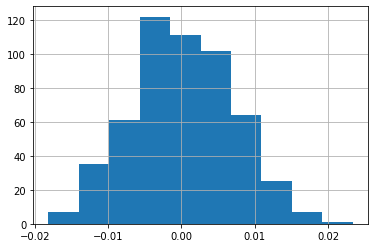

In [427]:
temp = proj.total_points(grades) - noise
mean = ((temp >= 0.02) | (temp <= -0.02)).mean()
temp.hist(), mean

In [428]:
temp.std()

0.006859639075952756

In [429]:
noise_p = proj.total_points_with_noise(grades)

In [430]:
np.all((0 <= noise_p) & (noise_p <= 1))

True

In [431]:
0.7 < noise_p.mean() < 0.9

True

### Short-answer questions (hard-coded)

Use your functions from above to understanding the data and answer the following questions. The function below should return **hard-coded values**. It should not compute anything!

**Question 10**

Create a function `short_answer` of zero variables that returns (hard-coded) answers to the following question in a list:
0. For the class on average, what is the difference between students' scores (`total_points`) and their scores with noise (`total_points_with_noise`)? (Remark: plot the distribution of differences; does this align with what you know about binomial distributions?)
1. What percentage of the class only sees their grade change at most (but not including) $\pm 0.01$?
2. What is the 95% confidence interval for the statistic above? (see [DSC10](https://www.inferentialthinking.com/chapters/13/3/Confidence_Intervals.html) and use `np.percentile`)
3. What proportion of the class sees a change in their letter grade?
4. The assumption behind the model in Question 9 is that:
    - The (observed) gradebook well represents the true population of students,
    - The noisy scores represent other possible observations drawn from the true population of students.
    - Answer `True` or `False`

# Need to ask!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [432]:
total = proj.total_points(grades)
# noise = proj.total_points_with_noise(grades)
# noise

In [433]:
short_answer = [
# Q0
'The average difference between total_points and total_points_with_noise is 0.0037, which is close to 0.',

# Q1
85.42, 

# Q2
[80.18691589, 86.1682243 ], 

# Q3
36, 

# Q4
True]

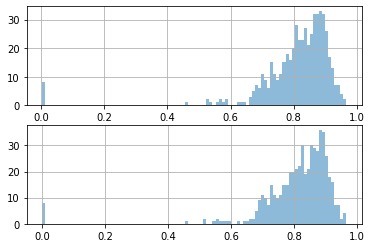

In [434]:
# Q0
plt.subplot(2, 1, 1)
pd.Series(noise).hist(bins = 100, alpha = 0.5)

plt.subplot(2, 1, 2)
pd.Series(total).hist(bins = 100, alpha = 0.5)

In [435]:
# Q1
noise = proj.total_points_with_noise(grades)
total = proj.total_points(grades)
differences = (noise - total)
# differences = np.array(total_points - rand_points) * 100 # Does the difference mean out of 100 score? If not then 100% will be within 0.01
100 * np.count_nonzero(np.abs(differences) < 0.01) / len(differences)

85.04672897196262

In [499]:
# Q2 # Weird Ask!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def bootstrap(sample, replications):
    
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    
    # just_one_column = original_sample[label]
    differences = []
    for i in range(replications):
        bootstrap = proj.total_points_with_noise(grades)
        resampled_stats = 100 * np.count_nonzero(np.abs(bootstrap - sample) < 0.01) / len(bootstrap) 
        differences.append(resampled_stats)
        
    return differences

boot = bootstrap(total, 10000)

In [500]:
np.percentile(boot, [2.5, 97.5])

array([80.18691589, 86.35514019])

In [502]:
boot.sort()
boot

[77.00934579439253,
 77.19626168224299,
 77.38317757009345,
 77.38317757009345,
 77.38317757009345,
 77.57009345794393,
 77.75700934579439,
 77.94392523364486,
 77.94392523364486,
 78.13084112149532,
 78.3177570093458,
 78.3177570093458,
 78.3177570093458,
 78.50467289719626,
 78.50467289719626,
 78.50467289719626,
 78.50467289719626,
 78.50467289719626,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.69158878504673,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 78.8785046728972,
 79.06542056074767,
 79.06542056074767,
 79.06542056074767,
 7

0.15514018691588785

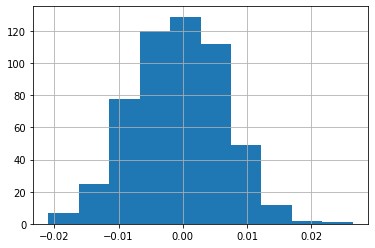

In [476]:
noise = proj.total_points_with_noise(grades)
total = proj.total_points(grades)
diff = np.array(noise - total)
(noise - total).hist()
len(diff[(diff >= 0.01) | (diff <= -0.01)]) / len(diff)

In [437]:
# bootstrap(total, 1000)

In [498]:
# Q3
noise = proj.total_points_with_noise(grades)
letter_rand = noise.apply(score_to_grades)
letter = total.apply(score_to_grades)
np.count_nonzero(letter != letter_rand) / len(letter)

0.0691588785046729

In [198]:
# Q4 # Ask!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
True

True

# Congratulations, you finished the project!

### Before you submit:
* Be sure you run the doctests on all your code in project01.py

### To submit:
* **Upload the .py file to gradescope**